Namespace(aggregator_type='gcn', dataset=None, dropout=0.5, fff='/root/.local/share/jupyter/runtime/kernel-ed06c2eb-52e6-444a-b7df-e5671967605a.json', gpu=-1, lr=0.01, n_epochs=500, n_hidden=32, n_layers=1, weight_decay=0.0005)
  NumNodes: 3327
  NumEdges: 9228
  NumFeats: 3703
  NumClasses: 6
  NumTrainingSamples: 120
  NumValidationSamples: 500
  NumTestSamples: 1000
Done loading data from cached files.
----Data statistics------'
      #Edges 9228
      #Classes 6
      #Train samples 120
      #Val samples 500
      #Test samples 1000
Epoch 00000 | Time(s) nan | Loss 1.7914 | Accuracy 0.1120 | ETputs(KTEPS) nan


/usr/local/lib/python3.7/dist-packages/dgl/data/utils.py:285: UserWarning: Property dataset.graph will be deprecated, please use dataset[0] instead.
  warnings.warn('Property {} will be deprecated, please use {} instead.'.format(old, new))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 00001 | Time(s) nan | Loss 1.7844 | Accuracy 0.3020 | ETputs(KTEPS) nan
Epoch 00002 | Time(s) nan | Loss 1.7751 | Accuracy 0.4820 | ETputs(KTEPS) nan
Epoch 00003 | Time(s) 0.1020 | Loss 1.7649 | Accuracy 0.5320 | ETputs(KTEPS) 89.29
Epoch 00004 | Time(s) 0.1002 | Loss 1.7464 | Accuracy 0.5460 | ETputs(KTEPS) 90.88
Epoch 00005 | Time(s) 0.1000 | Loss 1.7357 | Accuracy 0.5520 | ETputs(KTEPS) 91.04
Epoch 00006 | Time(s) 0.0995 | Loss 1.7102 | Accuracy 0.5520 | ETputs(KTEPS) 91.45
Epoch 00007 | Time(s) 0.1007 | Loss 1.7020 | Accuracy 0.5840 | ETputs(KTEPS) 90.44
Epoch 00008 | Time(s) 0.1004 | Loss 1.6796 | Accuracy 0.6200 | ETputs(KTEPS) 90.65
Epoch 00009 | Time(s) 0.1002 | Loss 1.6619 | Accuracy 0.6480 | ETputs(KTEPS) 90.87
Epoch 00010 | Time(s) 0.1000 | Loss 1.6375 | Accuracy 0.6760 | ETputs(KTEPS) 91.08
Epoch 00011 | Time(s) 0.0999 | Loss 1.6171 | Accuracy 0.6920 | ETputs(KTEPS) 91.13
Epoch 00012 | Time(s) 0.0995 | Loss 1.6065 | Accuracy 0.6960 | ETputs(KTEPS) 91.47
Epoch 00013 | 

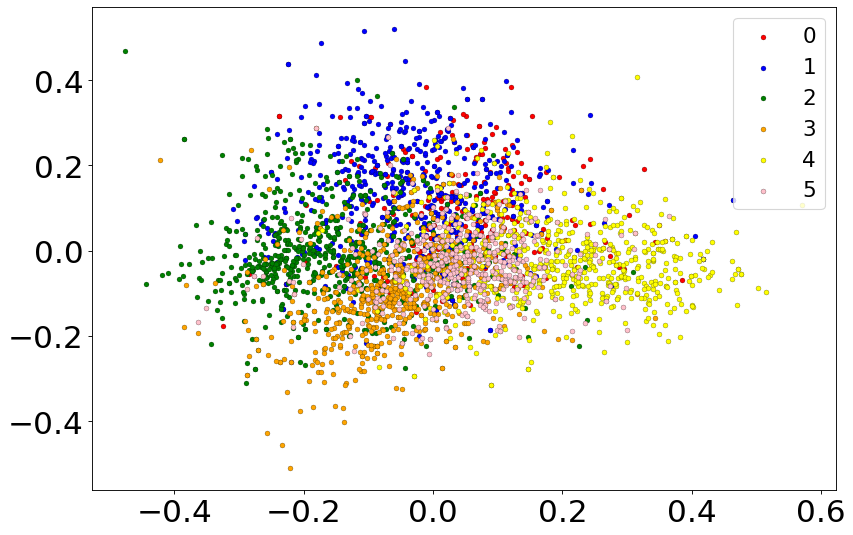

running tsne
tsne time 25.20516610145569
silhouette average 0.08470523 std 0.3453148
davies bouldin score 2.1584844822142295
calinski harabasz score 635.9223745626706


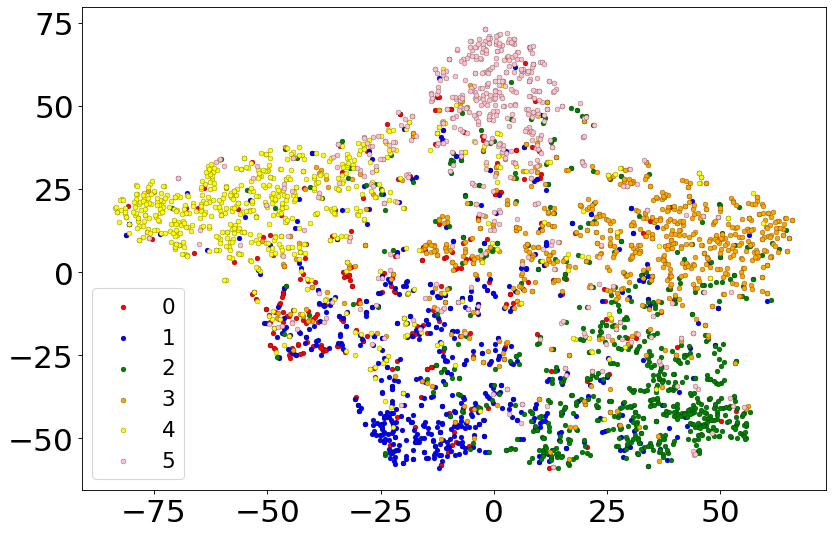

running umap
umap time 15.508173942565918
silhouette average 0.09485482 std 0.37384564
davies bouldin score 2.0851564042563644
calinski harabasz score 658.7338699448852


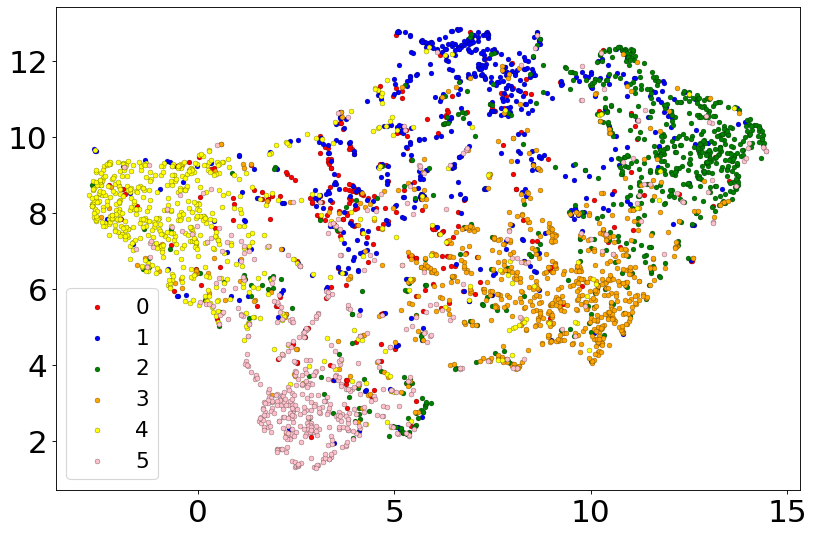

100%|██████████| 3327/3327 [00:00<00:00, 69303.75it/s]

running ivis
Building KNN index



 53%|█████▎    | 1747/3327 [00:00<00:00, 17437.67it/s]

Extracting KNN neighbours


100%|██████████| 3327/3327 [00:00<00:00, 8215.40it/s] 


Training neural network
Epoch 1/1000
26/26 [==============================] - 2s 16ms/step - loss: 1.0799
Epoch 2/1000
26/26 [==============================] - 0s 15ms/step - loss: 1.0192
Epoch 3/1000
26/26 [==============================] - 0s 15ms/step - loss: 0.9296
Epoch 4/1000
26/26 [==============================] - 0s 17ms/step - loss: 0.8110
Epoch 5/1000
26/26 [==============================] - 0s 15ms/step - loss: 0.6955
Epoch 6/1000
26/26 [==============================] - 0s 16ms/step - loss: 0.6239
Epoch 7/1000
26/26 [==============================] - 0s 17ms/step - loss: 0.5739
Epoch 8/1000
26/26 [==============================] - 0s 16ms/step - loss: 0.5191
Epoch 9/1000
26/26 [==============================] - 0s 15ms/step - loss: 0.4757
Epoch 10/1000
26/26 [==============================] - 0s 16ms/step - loss: 0.4548
Epoch 11/1000
26/26 [==============================] - 0s 16ms/step - loss: 0.4093
Epoch 12/1000
26/26 [==============================] - 0s 15ms/step - lo

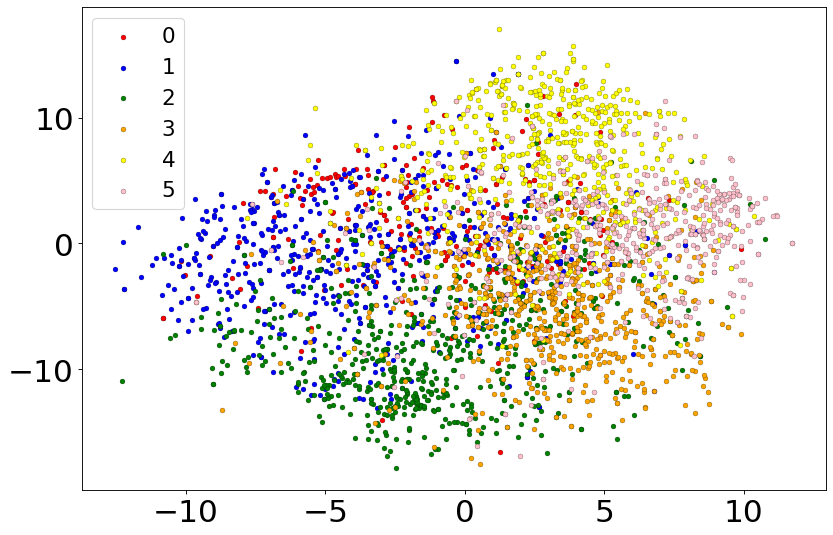

Epoch 00499 | Time(s) 0.3694 | Loss 0.2230 | Accuracy 0.7040 | ETputs(KTEPS) 24.65

Test Accuracy 0.7070


In [4]:
"""
Inductive Representation Learning on Large Graphs
Paper: http://papers.nips.cc/paper/6703-inductive-representation-learning-on-large-graphs.pdf
Code: https://github.com/williamleif/graphsage-simple
Simple reference implementation of GraphSAGE.
"""

!pip install dgl
!pip install umap-learn
!pip install ivis[cpu]
import umap
import argparse
import time
import numpy as np
import networkx as nx
import torch
import torch.nn as nn
import torch.nn.functional as F
from ivis import Ivis
import dgl
from dgl import DGLGraph
from dgl.data import register_data_args, load_data
from dgl.nn.pytorch.conv import SAGEConv
import sys
sys.path.append('/content/drive/MyDrive/Thesis')
from visualize_embeddings import *
sys.path.append('/content/drive/MyDrive/Thesis/graphsage')
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from scipy.io import savemat
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score

class GraphSAGE(nn.Module):
    def __init__(self,
                 in_feats,
                 n_hidden,
                 n_classes,
                 n_layers,
                 activation,
                 dropout,
                 aggregator_type):
        super(GraphSAGE, self).__init__()
        self.layers = nn.ModuleList()
        self.dropout = nn.Dropout(dropout)
        self.activation = activation

        # input layer
        self.layers.append(SAGEConv(in_feats, n_hidden, aggregator_type))
        # hidden layers
        for i in range(n_layers - 1):
            self.layers.append(SAGEConv(n_hidden, n_hidden, aggregator_type))
        # output layer
        self.layers.append(SAGEConv(n_hidden, n_classes, aggregator_type)) # activation None

    def forward(self, graph, inputs):
        hidden = []
        h = self.dropout(inputs)
        for l, layer in enumerate(self.layers):
            h = layer(graph, h)
            hidden.append(h)
            if l != len(self.layers) - 1:
                h = self.activation(h)
                h = self.dropout(h)
        return hidden[0],h


def evaluate(model, graph, features, labels, nid):
    model.eval()
    with torch.no_grad():
        h,logits = model(graph, features)
        logits = logits[nid]
        labels = labels[nid]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

def main(args):
    # load and preprocess dataset
    data = load_data(args)
    g = data[0]
    features = g.ndata['feat']
    labels = g.ndata['label']
    train_mask = g.ndata['train_mask']
    val_mask = g.ndata['val_mask']
    test_mask = g.ndata['test_mask']
    in_feats = features.shape[1]
    n_classes = data.num_classes
    n_edges = data.graph.number_of_edges()
    print("""----Data statistics------'
      #Edges %d
      #Classes %d
      #Train samples %d
      #Val samples %d
      #Test samples %d""" %
          (n_edges, n_classes,
           train_mask.int().sum().item(),
           val_mask.int().sum().item(),
           test_mask.int().sum().item()))

    if args.gpu < 0:
        cuda = False
    else:
        cuda = True
        torch.cuda.set_device(args.gpu)
        features = features.cuda()
        labels = labels.cuda()
        train_mask = train_mask.cuda()
        val_mask = val_mask.cuda()
        test_mask = test_mask.cuda()
        print("use cuda:", args.gpu)

    train_nid = train_mask.nonzero().squeeze()
    val_nid = val_mask.nonzero().squeeze()
    test_nid = test_mask.nonzero().squeeze()

    # graph preprocess and calculate normalization factor
    g = dgl.remove_self_loop(g)
    n_edges = g.number_of_edges()
    if cuda:
        g = g.int().to(args.gpu)

    # create GraphSAGE model
    model = GraphSAGE(in_feats,
                      args.n_hidden,
                      n_classes,
                      args.n_layers,
                      F.relu,
                      args.dropout,
                      args.aggregator_type)

    if cuda:
        model.cuda()

    # use optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=args.lr, weight_decay=args.weight_decay)

    # initialize graph
    dur = []
    for epoch in range(args.n_epochs):
        model.train()
        if epoch >= 3:
            t0 = time.time()
        # forward
        h,logits = model(g, features)
        loss = F.cross_entropy(logits[train_nid], labels[train_nid])

        if epoch == args.n_epochs-1:
          array = h.detach().numpy()+np.finfo(float).eps
          norm_array = zscore(array)
          print('h',array.shape)
          classes = labels.detach().numpy()
          #print(classes)
          _, indices = torch.max(logits, dim=1)
          print('train_mask',train_mask.sum())
          print('test_mask',test_mask.sum())
          savemat('gsageciteseer.mat', {'gsageciteseer_embeddings_all': norm_array,'gsageciteseer_node_labels_all': classes,
                               'gsageciteseer_embeddings_train': norm_array[train_mask],'gsageciteseer_node_labels_train': classes[train_mask],
                               'gsageciteseer_embeddings_test': norm_array[test_mask],'gsageciteseer_node_labels_test': classes[test_mask]})
          
          node_labels = indices.detach().numpy()
          num_classes = len(set(indices.detach().numpy()))
          
          methods = ['pca','tsne','umap','ivis']
          run_visualizations(methods,hidden_embeddings=array,
                             labels=classes,perplexity=30,neighbors=10,min_dist=0.2,supervised=False)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch >= 3:
            dur.append(time.time() - t0)

        acc = evaluate(model, g, features, labels, val_nid)
        print("Epoch {:05d} | Time(s) {:.4f} | Loss {:.4f} | Accuracy {:.4f} | "
              "ETputs(KTEPS) {:.2f}".format(epoch, np.mean(dur), loss.item(),
                                            acc, n_edges / np.mean(dur) / 1000))

    print()
    acc = evaluate(model, g, features, labels, test_nid)
    print("Test Accuracy {:.4f}".format(acc))


if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='GraphSAGE')
    register_data_args(parser)
    parser.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")
    parser.add_argument("--dropout", type=float, default=0.5,
                        help="dropout probability")
    parser.add_argument("--gpu", type=int, default=-1,
                        help="gpu")
    parser.add_argument("--lr", type=float, default=1e-2,
                        help="learning rate")
    parser.add_argument("--n-epochs", type=int, default=500,
                        help="number of training epochs")
    parser.add_argument("--n-hidden", type=int, default=32,
                        help="number of hidden gcn units")
    parser.add_argument("--n-layers", type=int, default=1,
                        help="number of hidden gcn layers")
    parser.add_argument("--weight-decay", type=float, default=5e-4,
                        help="Weight for L2 loss")
    parser.add_argument("--aggregator-type", type=str, default="gcn",
                        help="Aggregator type: mean/gcn/pool/lstm")
    args = parser.parse_args()
    print(args)
    args.dataset = 'citeseer'
    main(args)